In [1]:
import numpy as np
import pandas as pd

from astropy import coordinates
from astropy.coordinates import match_coordinates_sky
import astropy.units as u
import astroquery
from astroquery.irsa import Irsa
from astroquery.vizier import Vizier
from astropy.table import Table, join

Irsa.ROW_LIMIT = -1
Vizier.ROW_LIMIT = -1

import matplotlib.pyplot as plt

%matplotlib inline

# Get the data

In [2]:
obj = ["PKS J0006-0623", 1.55789, -6.39315, 1.0]
# name, ra, dec, radius of cone
obj_name = obj[0]
obj_ra   = obj[1]
obj_dec  = obj[2]
cone_radius  = obj[3]

In [3]:
obj_coord = coordinates.SkyCoord(ra=obj_ra, dec=obj_dec, unit=(u.deg, u.deg), frame="icrs")

In [4]:
data_2mass = Irsa.query_region(obj_coord, catalog="fp_psc", radius=cone_radius * u.deg)
data_wise  = Irsa.query_region(obj_coord, catalog="allwise_p3as_psd", radius=cone_radius * u.deg)
__data_galex = Vizier.query_region(obj_coord, catalog='II/335', radius=cone_radius * u.deg)
data_galex = __data_galex[0]

In [5]:
num_2mass = len(data_2mass)
num_wise  = len(data_wise)
num_galex = len(data_galex)

print("Number of object in (2MASS, WISE, GALEX): ", num_2mass, num_wise, num_galex)

Number of object in (2MASS, WISE, GALEX):  4802 38322 10105


# Matching coordinates (3 Catalogs)

In [6]:
ra_2mass = data_2mass['ra']
dec_2mass = data_2mass['dec']
c_2mass = coordinates.SkyCoord(ra=ra_2mass, dec=dec_2mass, unit=(u.deg, u.deg), frame="icrs")

ra_wise  = data_wise['ra']
dec_wise = data_wise['dec']
c_wise = coordinates.SkyCoord(ra=ra_wise, dec=dec_wise, unit=(u.deg, u.deg), frame="icrs")

ra_galex  = data_galex['RAJ2000']
dec_galex = data_galex['DEJ2000']
c_galex = coordinates.SkyCoord(ra=ra_galex, dec=dec_galex, unit=(u.deg, u.deg), frame="icrs")

In [7]:
sep_min = 1.0 * u.arcsec # minimum separation in arcsec

In [8]:
idx_2mass, idx_wise, d2d, d3d = c_wise.search_around_sky(c_2mass, sep_min)
c_2mass_wise = c_2mass[idx_2mass]
print("Only 2MASS and WISE: ", len(idx_2mass))

Only 2MASS and WISE:  4292


# Plot W1-J vs W1

In [9]:
# from matching of 2 cats (2MASS and WISE) coordinate
w1 = data_wise[idx_wise]['w1mpro']
j = data_2mass[idx_2mass]['j_m']
w1j = w1-j

cutw1j = -1.7

# match between WISE and 2MASS
data_wise_2mass = data_wise[idx_wise] # WISE dataset

galaxy = data_wise_2mass[w1j<cutw1j] # https://academic.oup.com/mnras/article/448/2/1305/1055284

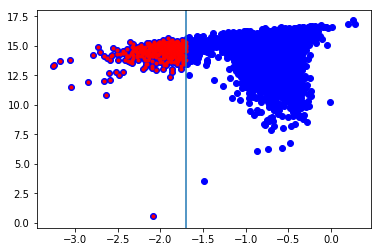

In [10]:
w1j_galaxy = w1j[w1j<cutw1j]
w1_galaxy = w1[w1j<cutw1j]
j_galaxy = j[w1j<cutw1j]

plt.scatter(w1j, w1, marker='o', color='blue')
plt.scatter(w1j_galaxy, w1_galaxy, marker='.', color="red")
          
plt.axvline(x=cutw1j) # https://academic.oup.com/mnras/article/448/2/1305/1055284

- W1-J < -1.7 => galaxy
- W1-J > -1.7 => stars

In [11]:
# + GALEX
___idx_2mass_wise_galex, idx_galex, d2d, d3d = c_galex.search_around_sky(c_2mass_wise, sep_min)

match_all_coord = c_galex[idx_galex]
print("Match all 3 cats: ", len(match_all_coord))

Match all 3 cats:  805


# Filter

In [12]:
### GALEX data which match with 2MASS and WISE!
match_galex = data_galex[idx_galex]
match_galex

RAJ2000,DEJ2000,r.fov,b,FUVmag,e_FUVmag,NUVmag,e_NUVmag,Fafl,Nafl,Fexf,Nexf,Fr,Nr
deg,deg,deg,,mag,mag,mag,mag,,,,,deg,deg
float64,float64,float64,uint8,float64,float32,float64,float32,int16,int16,int16,int16,float64,float64
1.557781,-6.393041,0.101573,3,20.6368,0.1609,19.9530,0.0759,0,0,0,0,0.001549,0.001684
1.554137,-6.366078,0.126470,3,22.8389,0.4704,21.8662,0.2772,0,0,0,0,0.001318,0.003755
1.553860,-6.353613,0.138562,1,--,--,22.1703,0.2785,0,0,0,0,--,0.002755
1.590100,-6.363029,0.141922,1,--,--,20.0085,0.0737,0,0,0,0,--,0.001814
1.558215,-6.348647,0.144365,1,--,--,22.6567,0.3793,0,0,0,0,--,0.003133
1.502271,-6.433094,0.060125,1,--,--,18.3912,0.0319,256,256,0,0,--,0.001411
1.614844,-6.445065,0.100044,1,--,--,21.1466,0.1444,256,0,0,0,--,0.002612
1.605844,-6.473730,0.082348,1,--,--,19.0770,0.0439,0,0,0,0,--,0.001269


In [13]:
idx_2mass, idx, d2d, d3d = match_all_coord.search_around_sky(c_2mass, sep_min)
match_2mass = data_2mass[idx_2mass]
match_2mass

ra,dec,clon,clat,err_maj,err_min,err_ang,designation,j_m,j_cmsig,j_msigcom,j_snr,h_m,h_cmsig,h_msigcom,h_snr,k_m,k_cmsig,k_msigcom,k_snr,ph_qual,rd_flg,bl_flg,cc_flg,ndet,gal_contam,mp_flg,hemis,xdate,scan,glon,glat,a,dist_opt,phi_opt,b_m_opt,vr_m_opt,nopt_mchs,ext_key,dist,angle,j_h,h_k,j_k,id
deg,deg,,,arcs,arcs,deg,,mag,mag,mag,,mag,mag,mag,,mag,mag,mag,,,,,,,,,,,,deg,deg,,arcs,deg,mag,mag,,,arcs,deg,,,,
float64,float64,object,object,float64,float64,int32,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,int32,int32,object,object,int32,float64,float64,object,float64,int32,float64,float64,int32,int32,float64,float64,float64,float64,float64,object
1.558,-6.393,00h06m13.89s,-06d23m35.53s,0.12,0.12,45,00061388-0623355,14.736,0.036,0.037,52.9,13.839,0.039,0.04,49.9,12.878,0.03,0.032,61.7,AAA,222,111,000,666666,0,0,s,1998-10-07,86,93.505,-66.647,U,0.7,230,19.1,17.8,1,--,0.207142,200.207,0.897,0.961,1.858,0
1.554,-6.366,00h06m13.00s,-06d21m57.42s,0.28,0.26,33,00061299-0621574,17.213,0.209,0.209,5.4,16.297,0.207,0.207,5.2,15.614,0.233,0.233,5.0,CCD,222,111,000,060605,0,0,s,1998-10-07,86,93.527,-66.62,U,0.7,257,19.5,18.4,1,--,98.830962,352.21449,0.916,0.683,1.599,1
1.554,-6.353,00h06m12.97s,-06d21m12.43s,0.12,0.1,88,00061297-0621124,13.768,0.024,0.027,128.9,13.312,0.032,0.034,81.1,13.181,0.037,0.038,46.7,AAA,222,111,000,666666,0,0,s,1998-10-07,86,93.541,-66.609,U,0.9,211,16.1,15.0,1,--,143.570458,354.498588,0.456,0.131,0.587,2
1.590,-6.363,00h06m21.62s,-06d21m47.34s,0.12,0.11,90,00062161-0621473,12.177,0.019,0.022,558.0,11.883,0.025,0.027,302.5,11.793,0.023,0.025,167.6,AAA,222,111,000,666655,0,0,s,1998-10-07,86,93.611,-66.634,U,0.8,134,14.7,13.0,1,--,157.889121,46.841074,0.294,0.09,0.384,5
1.558,-6.349,00h06m13.97s,-06d20m56.07s,0.15,0.14,84,00061397-0620560,16.034,0.081,0.082,16.0,15.837,0.144,0.145,7.9,15.472,0.215,0.215,5.7,ABC,222,111,000,160606,0,0,s,1998-10-07,86,93.555,-66.607,U,0.5,176,17.5,16.9,1,--,159.279337,0.432451,0.197,0.365,0.562,6
1.502,-6.433,00h06m00.56s,-06d25m59.63s,0.13,0.12,0,00060056-0625596,12.53,0.021,0.024,403.1,12.254,0.022,0.024,214.9,12.208,0.024,0.026,114.4,AAA,222,111,000,666655,0,0,s,1998-10-07,86,93.336,-66.658,U,0.9,230,14.6,13.3,1,--,245.570685,234.012711,0.276,0.046,0.322,19
1.615,-6.445,00h06m27.60s,-06d26m42.45s,0.2,0.19,77,00062760-0626424,16.288,0.101,0.102,12.7,15.978,0.158,0.158,7.0,15.589,--,--,--,ACU,220,110,000,160600,0,0,s,1998-10-07,87,93.576,-66.718,U,0.9,193,17.8,16.6,1,--,277.08834,132.477457,0.31,--,--,22
1.606,-6.474,00h06m25.41s,-06d28m26.14s,0.08,0.07,90,00062540-0628261,12.418,0.022,0.025,446.9,12.185,0.025,0.026,229.0,12.111,0.025,0.026,125.0,AAA,222,111,000,666666,0,0,s,1998-10-07,87,93.524,-66.74,U,0.4,107,14.6,13.2,1,--,337.656046,149.459281,0.233,0.074,0.307,33


In [17]:
ra_2mass = match_2mass['ra']
dec_2mass = match_2mass['dec']
c_2mass = coordinates.SkyCoord(ra=ra_2mass, dec=dec_2mass, unit=(u.deg, u.deg), frame="icrs")

idx_wise, idx, d2d, d3d = c_2mass.search_around_sky(c_wise, sep_min)
match_wise = data_wise[idx_wise]
match_wise

designation,ra,dec,clon,clat,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,w3mpro,w3sigmpro,w3snr,w3rchi2,w4mpro,w4sigmpro,w4snr,w4rchi2,nb,na,w1sat,w2sat,w3sat,w4sat,pmra,sigpmra,pmdec,sigpmdec,cc_flags,ext_flg,var_flg,ph_qual,moon_lev,w1nm,w1m,w2nm,w2m,w3nm,w3m,w4nm,w4m,dist,angle,id
,deg,deg,,,arcs,arcs,arcs,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,,,,,,,maspyr,maspyr,maspyr,maspyr,,,,,,,,,,,,,,arcs,deg,
object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,int32,int32,int32,int32,object,int32,object,object,object,int32,int32,int32,int32,int32,int32,int32,int32,float64,float64,object
J000613.88-062335.2,1.558,-6.393,00h06m13.89s,-06d23m35.29s,0.0339,0.0327,0.0038,12.151,0.023,46.5,1.868,11.009,0.02,55.1,1.575,8.022,0.021,52.3,1.116,5.52,0.042,26.0,0.8461,1,0,0.0,0.0,0.0,0.0,-69,129,-120,46,0000,0,9800,AAAA,1100,23,23,23,23,13,13,13,13,0.106915,298.345819,0
J000613.00-062157.5,1.554,-6.366,00h06m13.00s,-06d21m57.51s,0.1128,0.1167,-0.0309,15.412,0.044,24.5,0.8235,15.061,0.087,12.5,0.9805,11.912,0.316,3.4,1.037,8.688,--,0.7,1.13,1,0,0.0,0.0,0.0,0.0,124,394,277,411,0000,0,11nn,AABU,1100,24,24,12,24,1,13,0,13,98.725263,352.284058,23
J000612.96-062112.5,1.554,-6.353,00h06m12.96s,-06d21m12.56s,0.0508,0.0509,0.0069,13.177,0.025,43.0,1.031,13.228,0.032,33.4,0.8817,12.037,--,1.2,0.8604,8.738,--,0.6,0.9099,1,0,0.0,0.0,0.0,0.0,28,82,-1,84,0000,0,11nn,AAUU,1100,25,25,25,25,0,13,0,13,143.45453,354.439715,54
J000621.63-062147.2,1.590,-6.363,00h06m21.63s,-06d21m47.27s,0.0396,0.0377,0.0072,11.748,0.022,48.5,1.42,11.781,0.021,50.7,0.9124,12.319,0.407,2.7,0.9918,8.894,--,0.4,0.9516,1,0,0.0,0.0,0.0,0.0,19,50,52,49,0000,0,00nn,AACU,1100,24,24,25,25,0,14,0,14,158.048564,46.863251,72
J000613.98-062056.1,1.558,-6.349,00h06m13.98s,-06d20m56.14s,0.1252,0.131,-0.0338,15.595,0.047,23.0,1.025,15.67,0.144,7.5,0.8461,12.532,--,-1.5,0.9461,8.836,--,0.2,0.9917,1,0,0.0,0.0,0.0,0.0,-207,424,779,448,0000,0,0nnn,ABUU,1100,26,26,2,26,0,14,0,14,159.206988,0.466127,75
J000600.55-062559.5,1.502,-6.433,00h06m00.55s,-06d25m59.53s,0.0415,0.0405,0.0093,12.163,0.024,46.1,1.265,12.18,0.023,47.5,0.9112,12.251,0.437,2.5,0.8517,8.529,--,0.7,0.9465,1,0,0.0,0.0,0.0,0.0,-1,60,55,60,0000,0,01nn,AACU,1100,22,22,22,22,0,13,0,13,245.63661,234.052195,176
J000627.58-062643.0,1.615,-6.445,00h06m27.59s,-06d26m43.07s,0.1559,0.1602,-0.044,15.913,0.055,19.8,1.008,15.917,0.184,5.9,0.8695,12.413,--,0.4,0.9878,8.935,--,-0.6,1.031,1,0,0.0,0.0,0.0,0.0,-286,604,-102,625,D000,0,nnnn,ABUU,1100,22,23,2,23,0,13,0,13,277.306481,132.610592,220
J000625.41-062825.8,1.606,-6.474,00h06m25.42s,-06d28m25.86s,0.042,0.0402,0.0037,12.06,0.023,46.8,1.474,12.113,0.023,46.3,1.126,11.582,0.229,4.7,0.9584,8.814,--,-0.3,0.8055,1,0,0.0,0.0,0.0,0.0,-29,57,158,57,0000,0,11nn,AABU,1100,23,23,23,23,0,13,0,13,337.47995,149.414127,327


## Join table

In [18]:
# joindata = Table([match_2mass['j_m'], 
#                   match_2mass['j_m']-match_2mass['h_m'], 
#                   match_2mass['j_m']-match_2mass['k_m'],
#                   match_2mass['j_m']-match_wise['w1mpro'], 
#                   match_2mass['j_m']-match_wise['w2mpro'],
#                   match_2mass['j_m']-match_wise['w3mpro'],
#                   match_2mass['j_m']-match_wise['w4mpro'],
#                   match_2mass['j_m']-match_galex['NUVmag']], 
#                   names=('J', 'J-H', 'J-K', 'J-W1', 'J-W2', 'J-W3', 'J-W4', 'J-NUV'))

In [19]:
joindata = np.array([match_2mass['j_m'], 
                  match_2mass['j_m']-match_2mass['h_m'], 
                  match_2mass['j_m']-match_2mass['k_m'],
                  match_2mass['j_m']-match_wise['w1mpro'], 
                  match_2mass['j_m']-match_wise['w2mpro'],
                  match_2mass['j_m']-match_wise['w3mpro'],
                  match_2mass['j_m']-match_wise['w4mpro'],
                  match_2mass['j_m']-match_galex['NUVmag']])

joindata = joindata.T

In [20]:
# joindata = np.array([match_2mass['j_m'], match_2mass['h_m'], match_2mass['k_m'], 
#                      match_wise['w1mpro'], match_wise['w2mpro'], match_wise['w3mpro'], match_wise['w4mpro'],
#                      match_galex['NUVmag']])

# joindata = joindata.T

In [21]:
len(match_2mass['j_m'])

805

In [22]:
len(match_wise['w3mpro'])

805

# Analysis

### PCA

In [23]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X = scale(joindata)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

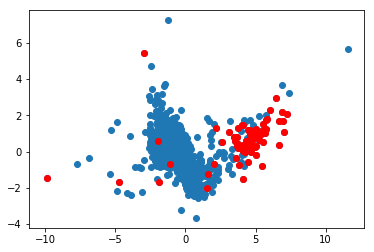

In [24]:
plt.scatter(X_r[:,0], X_r[:,1])
for i, name in enumerate(match_wise['designation']):
    for galaxyname in galaxy['designation']:
        if name == galaxyname:
            plt.scatter(X_r[i,0], X_r[i,1], color="red")  

### DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = scale(joindata)

db = DBSCAN(eps=0.2, min_samples=3).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print(labels)

Estimated number of clusters: 13


#### Plot J-W1 vs J

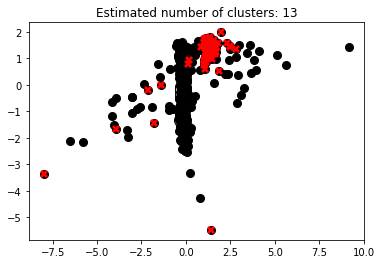

In [34]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    
    ## J vs J-W1
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 3], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 3], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)
    
for i, name in enumerate(match_wise['designation']):
    for galaxyname in galaxy['designation']:
        if name == galaxyname:
            plt.plot(X[i,3], X[i,0], marker="X", markerfacecolor='red', markeredgecolor='none', markersize=8)  

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### t-SNE

In [35]:
from sklearn.manifold import TSNE
X = scale(joindata)
X_r = TSNE(n_components=2).fit_transform(X)

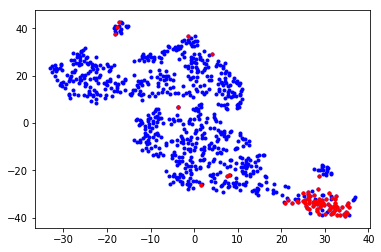

In [36]:
plt.scatter(X_r[:,0], X_r[:,1], marker='.', color="blue")
for i, name in enumerate(match_wise['designation']):
    for galaxyname in galaxy['designation']:
        if name == galaxyname:
            plt.scatter(X_r[i,0], X_r[i,1], marker='.', color="red")  